# K-Nearest Neighbors (KNN) Algorithm
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Foundations](#mathematical-foundations)
3. [Learning Algorithm](#learning-algorithm)
    - [Define the k-NN classifier based on Euclidean distance](#define-the-k-nn-classifier-based-on-euclidean-distance)
    - [Showcase the above classifier in the iris dataset](#showcase-the-above-classifier-in-the-iris-dataset)
    - [Use KNeighborsClassifier() class provided by Scikit-Learn in digits dataset](#use-kneighborsclassifier-class-provided-by-scikit-learn-in-digits-dataset)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)

## Introduction

The k-Nearest Neighbors (k-NN) algorithm is a type of supervised learning method that can be utilized for both classification and regression tasks. Originating from the early 1950s through the pattern recognition research of Fix and Hodges, k-NN gained popularity in the subsequent decades due to its straightforward approach and effectiveness across diverse tasks. Unique among algorithms, k-NN is an instance-based learning model, characterized as a lazy learning method because it doesn't construct an explicit model during training. Instead, it stores the entire training dataset, making predictions based on a measure of similarity among data points.

## Mathematical Foundations

The k-Nearest Neighbors (k-NN) algorithm is based on a distance measure. This measure quantifies how "close" data points are to each other in the feature space. The fundamental idea behind k-NN is that similar data points (i.e., data points that are close to each other in the feature space) should have similar labels or outputs.

There are several ways to measure the distance between data points. The most commonly used distance measures in k-NN are:

1. **Euclidean Distance**: This is the straight-line distance between two points in a space. It is the most common distance metric. Useful when all inputs have the same units. The Euclidean distance between two points `p` and `q` in a `n`-dimensional real space is defined as:

   $$ d(p, q) = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \ldots + (q_n-p_n)^2} = \sqrt{\sum_{i=1}^{n} (q_i-p_i)^2} $$

2. **Manhattan Distance**: This is the sum of the absolute differences of their coordinates. It is useful when the difference of the absolute coordinates is more important. The Manhattan distance between two points `p` and `q` in a `n`-dimensional real space is defined as:

   $$ d(p, q) = |q_1-p_1| + |q_2-p_2| + \ldots + |q_n-p_n| = \sum_{i=1}^{n} |q_i-p_i| $$

3. **Minkowski Distance**: This is a generalized metric form of Euclidean Distance and Manhattan Distance. It is the Generalization of Euclidean and Manhattan Distance. The Minkowski distance between two points `p` and `q` in a `n`-dimensional real space is defined as:

   $$ d(p, q) = \left( \sum_{i=1}^{n} |q_i-p_i|^r \right)^{1/r} $$

   Where `r` is the order of the Minkowski distance. When `r=1`, it becomes the Manhattan distance, and when `r=2`, it becomes the Euclidean distance.

The choice of distance measure can have a significant impact on the performance of the k-NN algorithm, and it generally depends on the problem at hand.


## Learning Algorithm

The learning algorithm for k-NN consists of the following steps:

1. **Initialize**: Select the number `k` of the neighbors.
2. **Calculate Distances**: For a given unlabeled observation, compute the distance between this observation and all other labeled observations in the dataset. The distance can be computed using any appropriate measure such as Euclidean, Manhattan, or Minkowski distance.
3. **Find Nearest Neighbors**: Identify the `k` observations in the training data that are closest to the unlabeled observation.
4. **Vote or Average**: If k-NN is being used for classification, assign the unlabeled observation to the class that has the most representatives within the `k` nearest neighbors. If k-NN is being used for regression, assign the unlabeled observation with the average value of the `k` nearest neighbors.
5. **Return the class (for classification) or value (for regression)**: The algorithm returns the predicted class or value for the unlabeled observation.

### Define the k-NN classifier based on Euclidean distance





In [33]:
import numpy as np
from collections import Counter

class KNN:
    """
    K-Nearest Neighbors (KNN) Classifier.

    Parameters
    ----------
    k : int, optional (default = 3)
        Number of neighbors to use in the majority voting.

    Attributes
    ----------
    X_train : array-like, shape = [n_samples, n_features]
        The training input samples.
    y_train : array-like, shape = [n_samples]
        The target values (class labels) for the training input samples.
    """
    def __init__(self, k=3):
        self.k = k

    # Static method to calculate euclidean distance
    @staticmethod
    def euclidean_distance(a, b):
        """
        Compute Euclidean distance between two points.
        
        Parameters:
        a (array-like): First point.
        b (array-like): Second point.
        
        Returns:
        float: The Euclidean distance between points a and b.
        """
        return np.sqrt(np.sum((a - b) ** 2))

    # Method to fit the model
    def fit(self, X, y):
        """
        Fit the model using X as training data and y as target values.
        
        Parameters:
        X (array-like): Training data.
        y (array-like): Target values.
        """
        self.X_train = X
        self.y_train = y

    # Method to predict the class for a given set of instances
    def predict(self, X):
        """
        Predict the class labels for the provided data.
        
        Parameters:
        X (array-like): Test samples.
        
        Returns:
        array-like: Predicted class label per sample.
        """
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    # Helper method to predict the class for a single instance
    def _predict(self, x):
        """
        Helper method to predict the class for a single instance using KNN algorithm.
        
        Parameters:
        x (array-like): A single instance.
        
        Returns:
        int or str: Predicted class label for the instance.
        """
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

### Showcase the above classifier in the iris dataset

Here we applied the above k-NN (k=3) clasifer to iris dataset with all four features and evaluate the performance of the classifier using the accuracy score and confusion matrix. Please refer to the corresponding [data notebook](../../data/iris/iris.ipynb) for more information about the iris dataset.

In [34]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Load the iris dataset and extract the features and labels
iris = load_iris()
print("features:" , iris.feature_names)
print("targets class: ", iris.target_names)
X, y = iris.data, iris.target

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets class:  ['setosa' 'versicolor' 'virginica']


Accuracy: 1.0


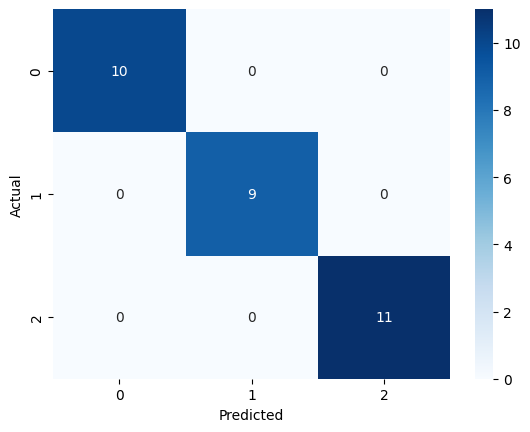

In [36]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply the k-NN algorithm
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [37]:
# Classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



To visualize the results, we use the first two features (sepal length and sepal width) of the iris dataset to re-train the classifier and plot the training data(circle), testing data (square) and the predicted testing data (cross) in the same plot.

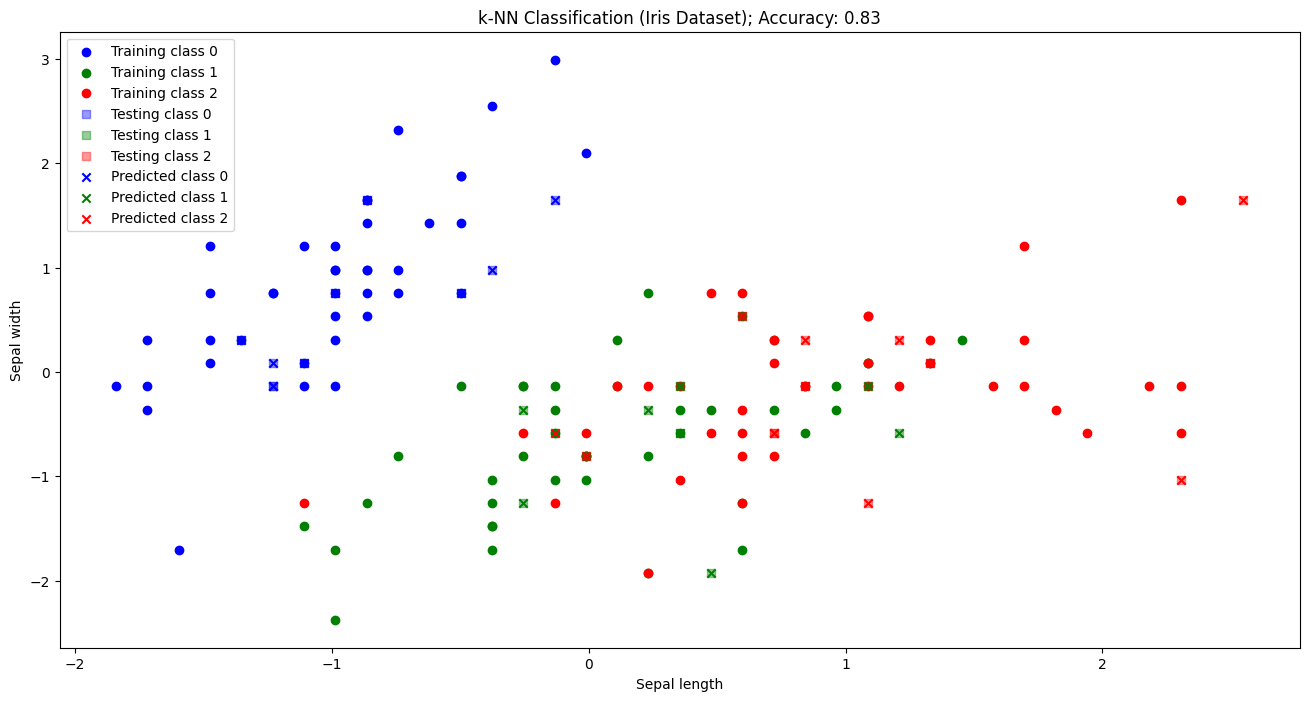

In [38]:
# Visualize the results (using only the first two features to train and test the model)
X_train_2d, X_test_2d = X_train[:, :2], X_test[:, :2]
knn.fit(X_train_2d, y_train)
y_pred_2d = knn.predict(X_test_2d)

# Evaluate the model
# Accuracy
accuracy_2d = accuracy_score(y_test, y_pred_2d)
# Visualize the result
plt.figure(figsize=(16, 8))

# Define colors for each class
colors = ['blue', 'green', 'red']

# Scatter plot for training data
for class_value, color in zip(np.unique(y_train), colors):
    plt.scatter(X_train_2d[y_train==class_value, 0], X_train_2d[y_train==class_value, 1], 
                marker='o', color=color, label=f'Training class {class_value}')
    
# Scatter plot for predicted test data
for class_value, color in zip(np.unique(y_test), colors):
    plt.scatter(X_test_2d[y_test==class_value, 0], X_test_2d[y_test==class_value, 1], 
                alpha=0.4,marker='s', color=color,label=f'Testing class {class_value}')

# Scatter plot for predicted (test) data
for class_value, color in zip(np.unique(y_pred_2d), colors):
    plt.scatter(X_test_2d[y_pred_2d==class_value, 0], X_test_2d[y_pred_2d==class_value, 1], 
                marker='x', color=color,label=f'Predicted class {class_value}')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='upper left')
plt.title(f'k-NN Classification (Iris Dataset); Accuracy: {round(accuracy_2d, 2)}')
plt.show()



### Use KNeighborsClassifier() class provided by Scikit-Learn in digits dataset

The `Digits` dataset, available in scikit-learn, is a preprocessed set of images of handwritten digits, originating from a database created by the National Institute of Standards and Technology. It is a small but substantial dataset, consisting of 1,797 8x8 images. Each image is of a hand-written digit, making it a useful tool for training and testing in the realm of machine learning.

In the scikit-learn version of the dataset, these images are flattened into 64-element feature vectors, representing the grayscale values of each pixel in the image. The target field is an integer from 0 to 9, corresponding to the actual digit the handwritten image represents.

This dataset has been processed and curated separately. Due to its smaller size and lower resolution, it is particularly well-suited for teaching purposes, demonstrating machine learning techniques on real-world data without necessitating substantial computational resources. Please refer to the corresponding [data notebook](../../data/digits/digits.ipynb) for more information about the dataset.

In [39]:
# Delete all previous variables
for _ in locals().copy():
    if _.startswith('__') or _.startswith('_'):
        continue
    del locals()[_]

In [40]:
# Import the required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X.shape:  (1797, 64) y.shape:  (1797,)
feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
target names: [0 1 2 3 4 5 6 7 8 9]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Dat

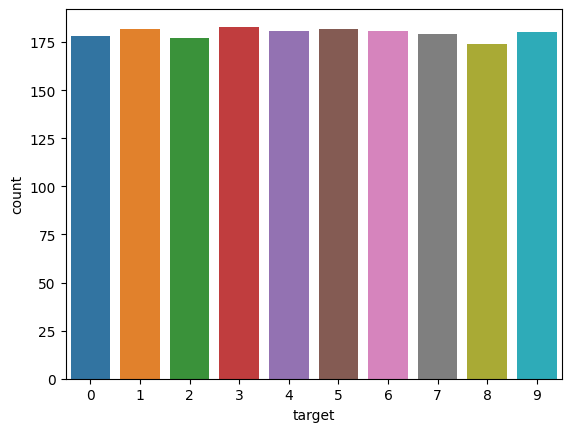

In [41]:
# Load the digits dataset
dataset = load_digits(as_frame=True)

print("X.shape: ",dataset.data.shape, "y.shape: ", dataset.target.shape)
print("feature names:", dataset.feature_names)
print("target names:", dataset.target_names)


# Feature information
dataset.data.info()
# Visualize the distribution of the target variable using a bar plot:
sns.countplot(x=dataset.target)
plt.show()

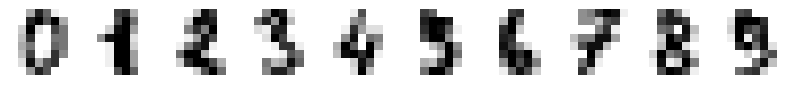

In [42]:
X, y = dataset.data, dataset.target

# Visualize the first 10 images in the dataset

# Plot the first 10 digits
fig, axes = plt.subplots(1, 10, figsize=(10, 1))

for i in range(10):
    axes[i].imshow(X.iloc[i].values.reshape(8, 8), cmap='binary')
    axes[i].axis('off')

plt.show()


Accuracy: 0.9833333333333333


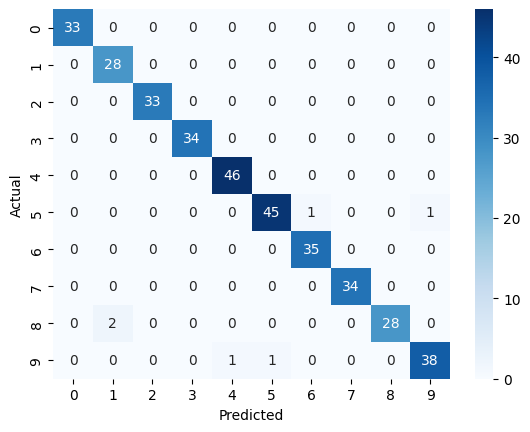

In [43]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a decision tree classifier with default hyperparameters
clf = KNeighborsClassifier(n_neighbors=10)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



True labels:  [6 9 3 7 2 1 5 2 5 2]
Predicted labels:  [6 9 3 7 2 1 5 2 5 2]


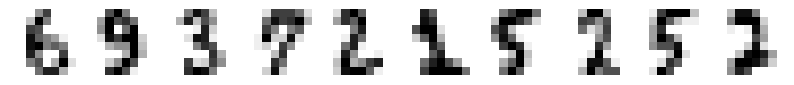

In [45]:
# print first 10 true and predicted digits
print("True labels: ", y_test[:10].values)
print("Predicted labels: ", y_pred[:10])

# Plot the first 10 digits in testing data
fig, axes = plt.subplots(1, 10, figsize=(10, 1))

for i in range(10):
    axes[i].imshow(X_test.iloc[i].values.reshape(8, 8), cmap='binary')
    axes[i].axis('off')

plt.show()

## Pros and Cons

**Pros:**
- Simple to understand and implement.
- Can adapt to the data as it does not make any assumptions about the underlying data distribution.
- Works well with small datasets.

**Cons:**
- Computationally expensive, especially for large datasets, as it needs to calculate the distance between the new data point and all the training data points.
- Sensitive to the choice of k and the distance metric.
- Does not work well with high-dimensional data (curse of dimensionality).
- Requires preprocessing (e.g., scaling) to ensure that all features have equal importance.

## Suitable Tasks and Datasets


k-Nearest Neighbors (kNN) is a simple yet powerful algorithm that can be used for a variety of tasks. Some of the suitable tasks for kNN include:

- Classification: kNN can be used for classification tasks where the goal is to predict a categorical target variable. Examples include image classification, sentiment analysis, recommender systems, and document classification.

- Regression: kNN can also be used for regression tasks where the goal is to predict a continuous target variable. Examples include predicting housing prices or stock prices.

- Anomaly detection: kNN can be used for anomaly detection where the goal is to identify data points that are significantly different from the rest of the dataset. This can be useful in fraud detection or intrusion detection.


kNN can work well with a variety of datasets. Some of the suitable datasets for kNN include:

- Image datasets: kNN can be used for image classification tasks using datasets such as MNIST, CIFAR-10, and ImageNet.

- Text datasets: kNN can be used for text classification tasks using datasets such as Reuters, 20 Newsgroups, and IMDB.

- Numerical datasets: kNN can be used for regression tasks using datasets such as the Boston Housing dataset and the California Housing dataset.

- Anomaly detection datasets: kNN can be used for anomaly detection tasks using datasets such as the KDD Cup 1999 dataset and the Credit Card Fraud Detection dataset.


## References

1. Fix, E. (1985). Discriminatory analysis: nonparametric discrimination, consistency properties (Vol. 1). USAF school of Aviation Medicine.
2. Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE transactions on information theory, 13(1), 21-27.
3. F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872
4. Scikit-Learn: k-Nearest Neighbors. https://scikit-learn.org/stable/modules/neighbors.html
5. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".